In [13]:
import cloudpickle as pickle
data = pickle.load( open( "mnist23.data", "rb" ) )

{'DESCR': 'mnist23: mnist data 2 and 3', 'COL_NAMES': ['label', 'data'], 'target': array([ 2.,  2.,  3., ...,  3.,  2.,  3.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


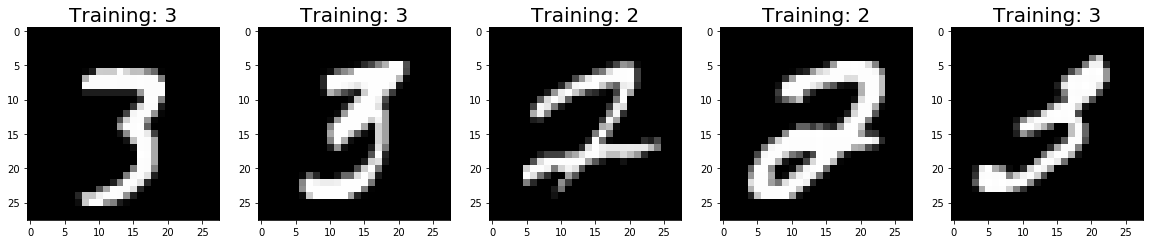

In [14]:
print(data)
X,y = data["data"], data["target"]

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data.data[500:505], data.target[500:505])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title("Training: %i" % label, fontsize = 20)
    
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, y_train = data.data[:70000] / 255., data.target[:70000]

pca = PCA(n_components=16)
X_r=pca.fit(data['data']).transform(data['data'])

X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'], random_state = 0)

#Normalizing value between 0 and 1
X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

#Reshaping the dataset
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])


#Rescaling the labels
y_train_shifted = y_train_tr - 2
y_test_shifted = y_test_tr - 2

Xtrain = X_train_tr
ytrain = y_train_shifted
Xtest = X_test_tr
ytest = y_test_shifted

def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

#Intializing weights and bias
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))
    return w,b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 2000 == 0:
            costs.append(cost)
            
        if print_cost and i % 2000 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

def predict (w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid (np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction

def model (X_train, Y_train, X_test, Y_test, num_iterations , learning_rate , print_cost = False):
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    return d

In [15]:
#First Execute the above two cells, in order to call the function
d = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 70000, 
           learning_rate = 0.05, 
           print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 2000) = 0.082806
Cost (iteration 4000) = 0.076135
Cost (iteration 6000) = 0.072758
Cost (iteration 8000) = 0.070462
Cost (iteration 10000) = 0.068712
Cost (iteration 12000) = 0.067296
Cost (iteration 14000) = 0.066108
Cost (iteration 16000) = 0.065087
Cost (iteration 18000) = 0.064192
Cost (iteration 20000) = 0.063397
Cost (iteration 22000) = 0.062681
Cost (iteration 24000) = 0.062031
Cost (iteration 26000) = 0.061437
Cost (iteration 28000) = 0.060888
Cost (iteration 30000) = 0.060379
Cost (iteration 32000) = 0.059905
Cost (iteration 34000) = 0.059460
Cost (iteration 36000) = 0.059042
Cost (iteration 38000) = 0.058647
Cost (iteration 40000) = 0.058274
Cost (iteration 42000) = 0.057919
Cost (iteration 44000) = 0.057582
Cost (iteration 46000) = 0.057260
Cost (iteration 48000) = 0.056952
Cost (iteration 50000) = 0.056657
Cost (iteration 52000) = 0.056374
Cost (iteration 54000) = 0.056102
Cost (iteration 56000) = 0.055841
Cost (iteration 58000)